## Deliverable 3. Create a Travel Itinerary Map.

In [93]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import gmaps

# Import API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [94]:
# 1. Read the WeatherPy_vacation.csv into a DataFrame.
vacation_df = pd.read_csv('Vacation_Search/WeatherPy_vacation.csv')
vacation_df.head()

,City_ID,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
0,0,Hermanus,ZA,72.81,scattered clouds,-34.4187,19.2345,Misty Waves Boutique Hotel
1,3,Rikitea,PF,77.54,overcast clouds,-23.1203,-134.9692,People ThankYou
2,5,Sola,VU,75.87,few clouds,-13.8833,167.5500,Leumerus Bungalows
3,10,Georgetown,MY,87.75,moderate rain,5.4112,100.3354,Cititel Penang
4,19,Bengkulu,ID,81.52,light rain,-3.8004,102.2655,Grage Hotel Bengkulu


In [97]:
# 2. Using the template add the city name, the country code, the weather description and maximum temperature for the city.
info_box_template = """
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Current Weather</dt><dd>{Current Description} and {Max Temp} °F</dd>
</dl>
"""


# 3a. Get the data from each row and add it to the formatting template and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in vacation_df.iterrows()]

# 3b. Get the latitude and longitude from each row and store in a new DataFrame.
locations = vacation_df[['Lat', 'Lng']]

In [98]:
# 4a. Add a marker layer for each city to the map.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.0)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(marker_layer)
# 4b. Display the figure
fig


Figure(layout=FigureLayout(height='420px'))

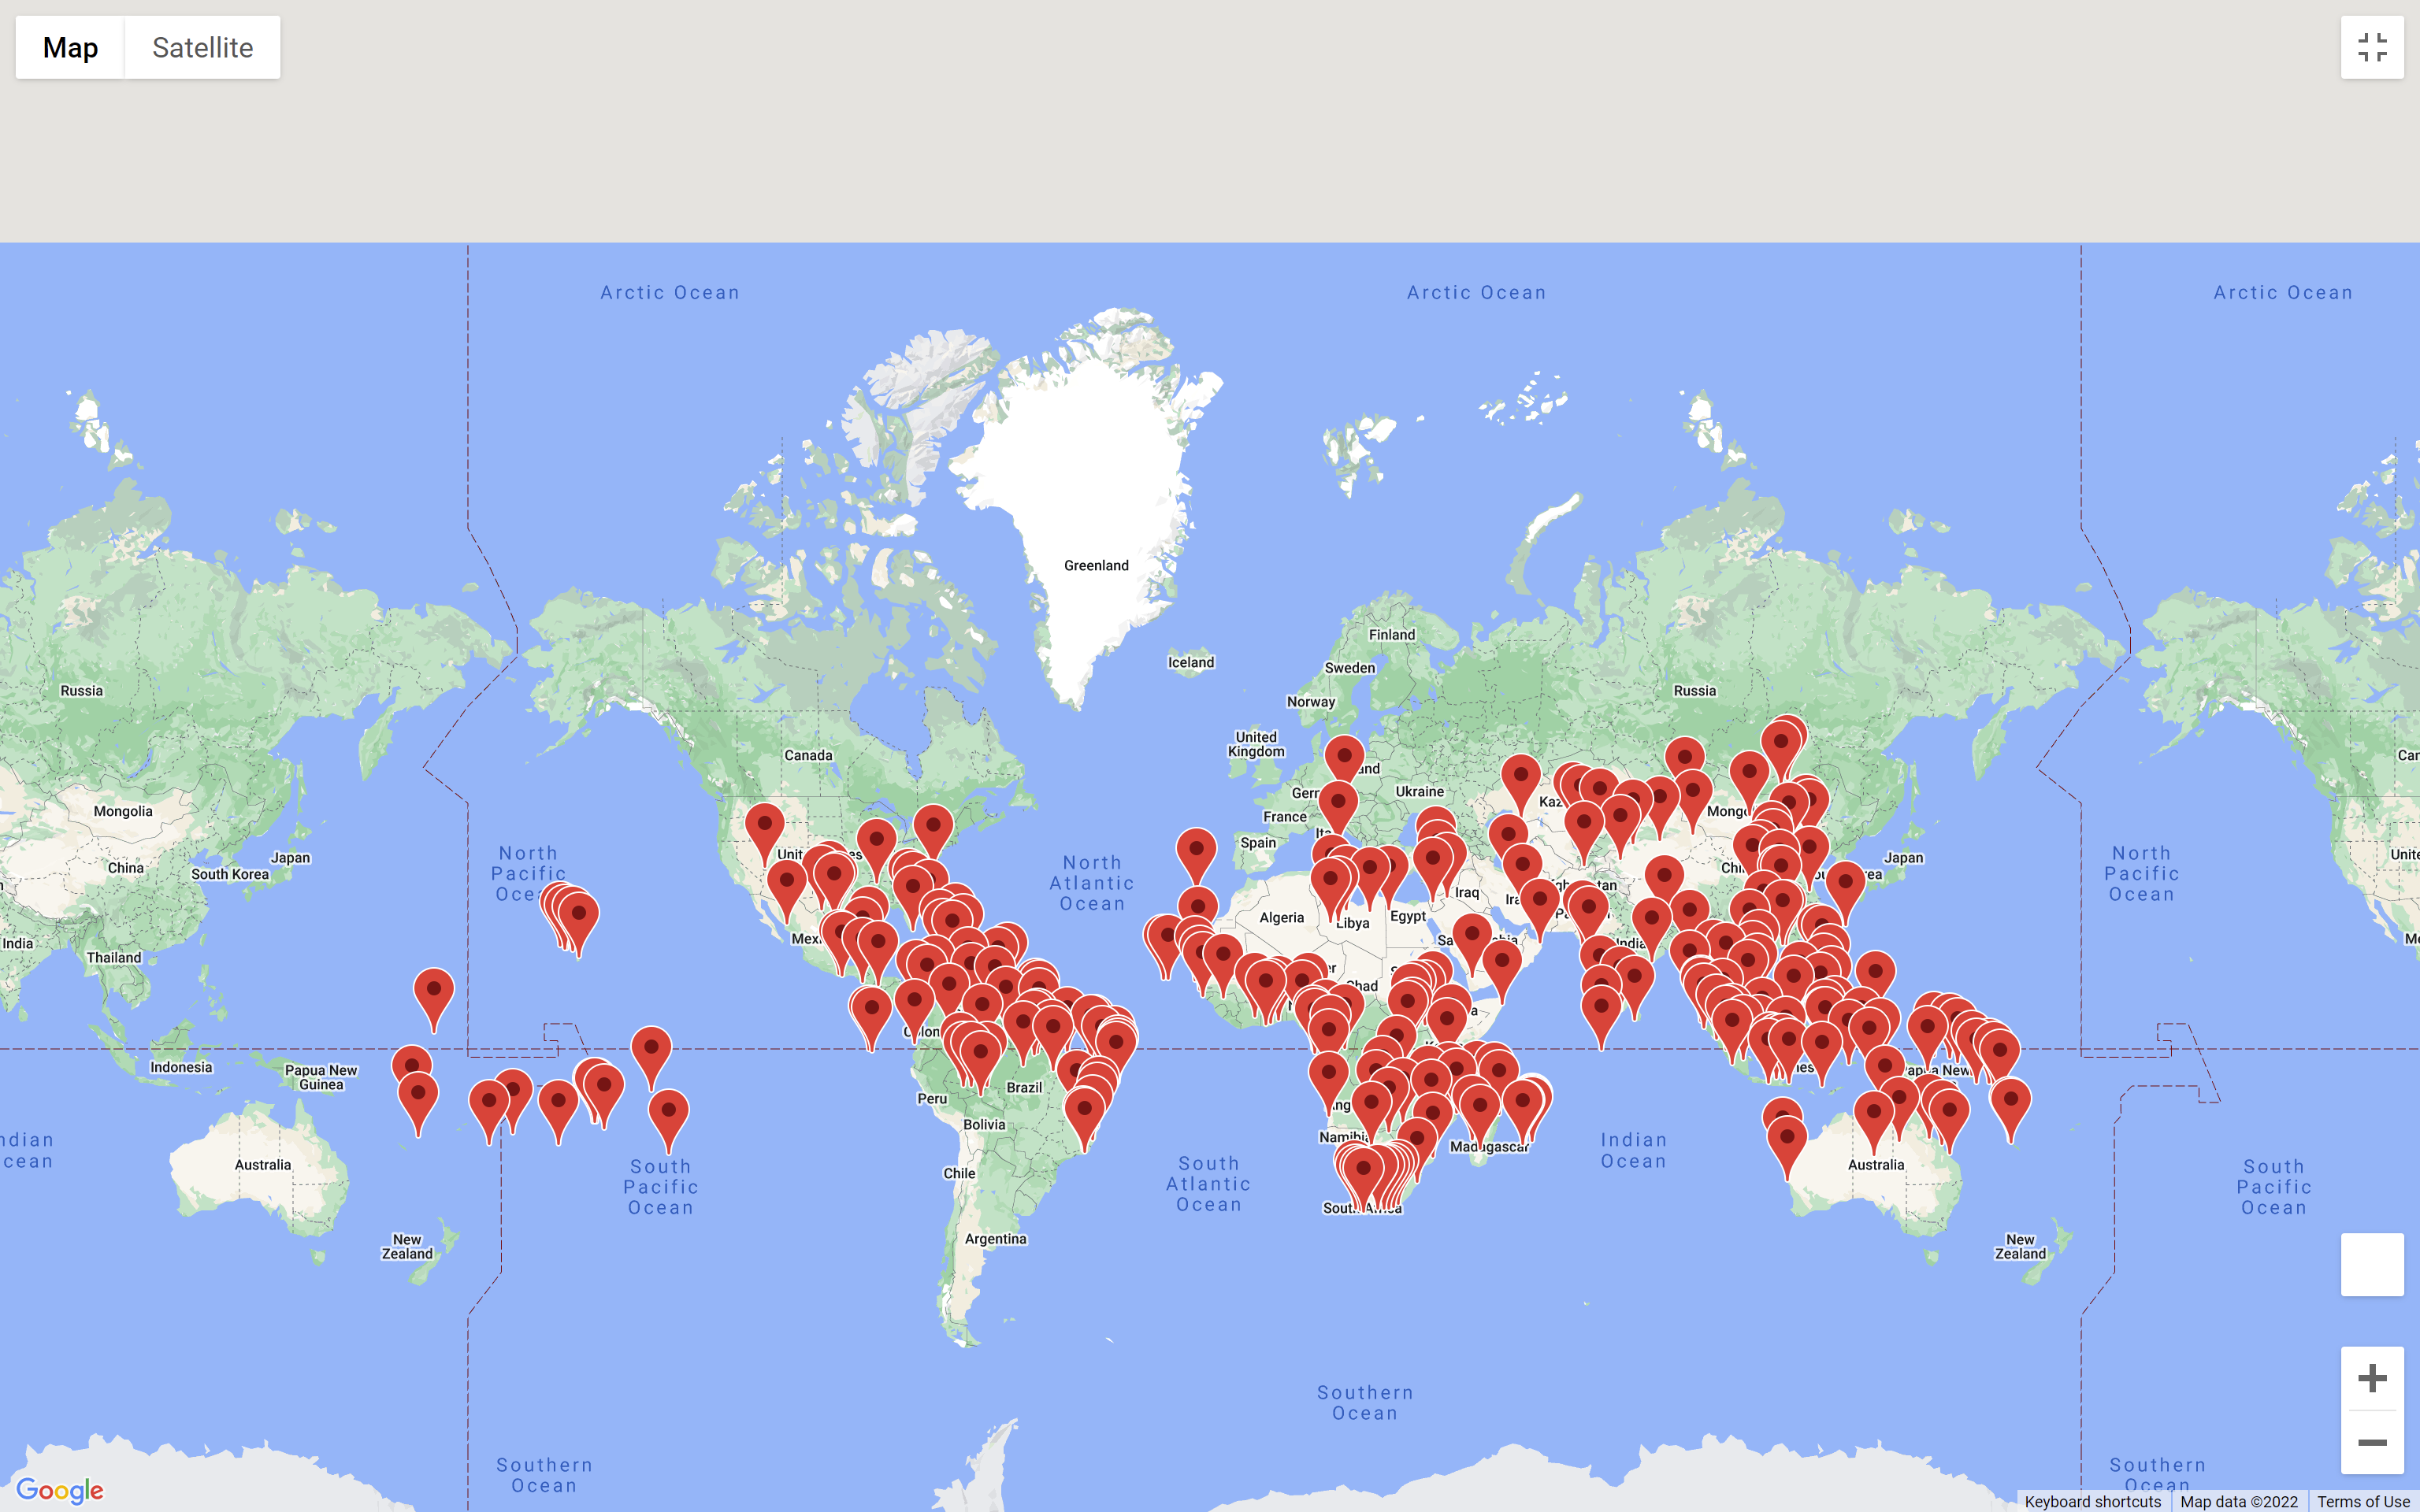

In [80]:
# From the map above pick 4 cities and create a vacation itinerary route to travel between the four cities. 
# 5. Create DataFrames for each city by filtering the 'vacation_df' using the loc method. 
# Hint: The starting and ending city should be the same city.

vacation_start = vacation_df.loc[(vacation_df['Hotel Name'] == 'Asia Metal Art')]
vacation_end = vacation_df.loc[(vacation_df['Hotel Name'] == 'Asia Metal Art')]
vacation_stop1 = vacation_df.loc[(vacation_df['Hotel Name'] == 'Puri Brata')]
vacation_stop2 = vacation_df.loc[(vacation_df['Hotel Name'] == 'Puri Bagus Lovina Resort')] 
vacation_stop3 = vacation_df.loc[(vacation_df['Hotel Name'] == 'OYO 3027 Griya Temenggungan Syariah')] 

In [82]:
# 6. Get the latitude-longitude pairs as tuples from each city DataFrame using the to_numpy function and list indexing.
start = [tuple(i) for i in (vacation_start[['Lat','Lng']].to_numpy())]
end = [tuple(i) for i in (vacation_end[['Lat','Lng']].to_numpy())]
stop1 = [tuple(i) for i in (vacation_stop1[['Lat','Lng']].to_numpy())]
stop2 = [tuple(i) for i in (vacation_stop2[['Lat','Lng']].to_numpy())]
stop3 = [tuple(i) for i in (vacation_stop3[['Lat','Lng']].to_numpy())]

In [88]:
# 7. Create a direction layer map using the start and end latitude-longitude pairs,
# and stop1, stop2, and stop3 as the waypoints. The travel_mode should be "DRIVING", "BICYCLING", or "WALKING".
fig = gmaps.figure()
ways = stop1 + stop2 + stop3
direction_layer = gmaps.directions_layer(start[0], end[0],
                                         waypoints=ways,
                                         travel_mode='DRIVING'
                                         )
fig.add_layer(direction_layer)
# 11b. Display the figure
fig



Figure(layout=FigureLayout(height='420px'))

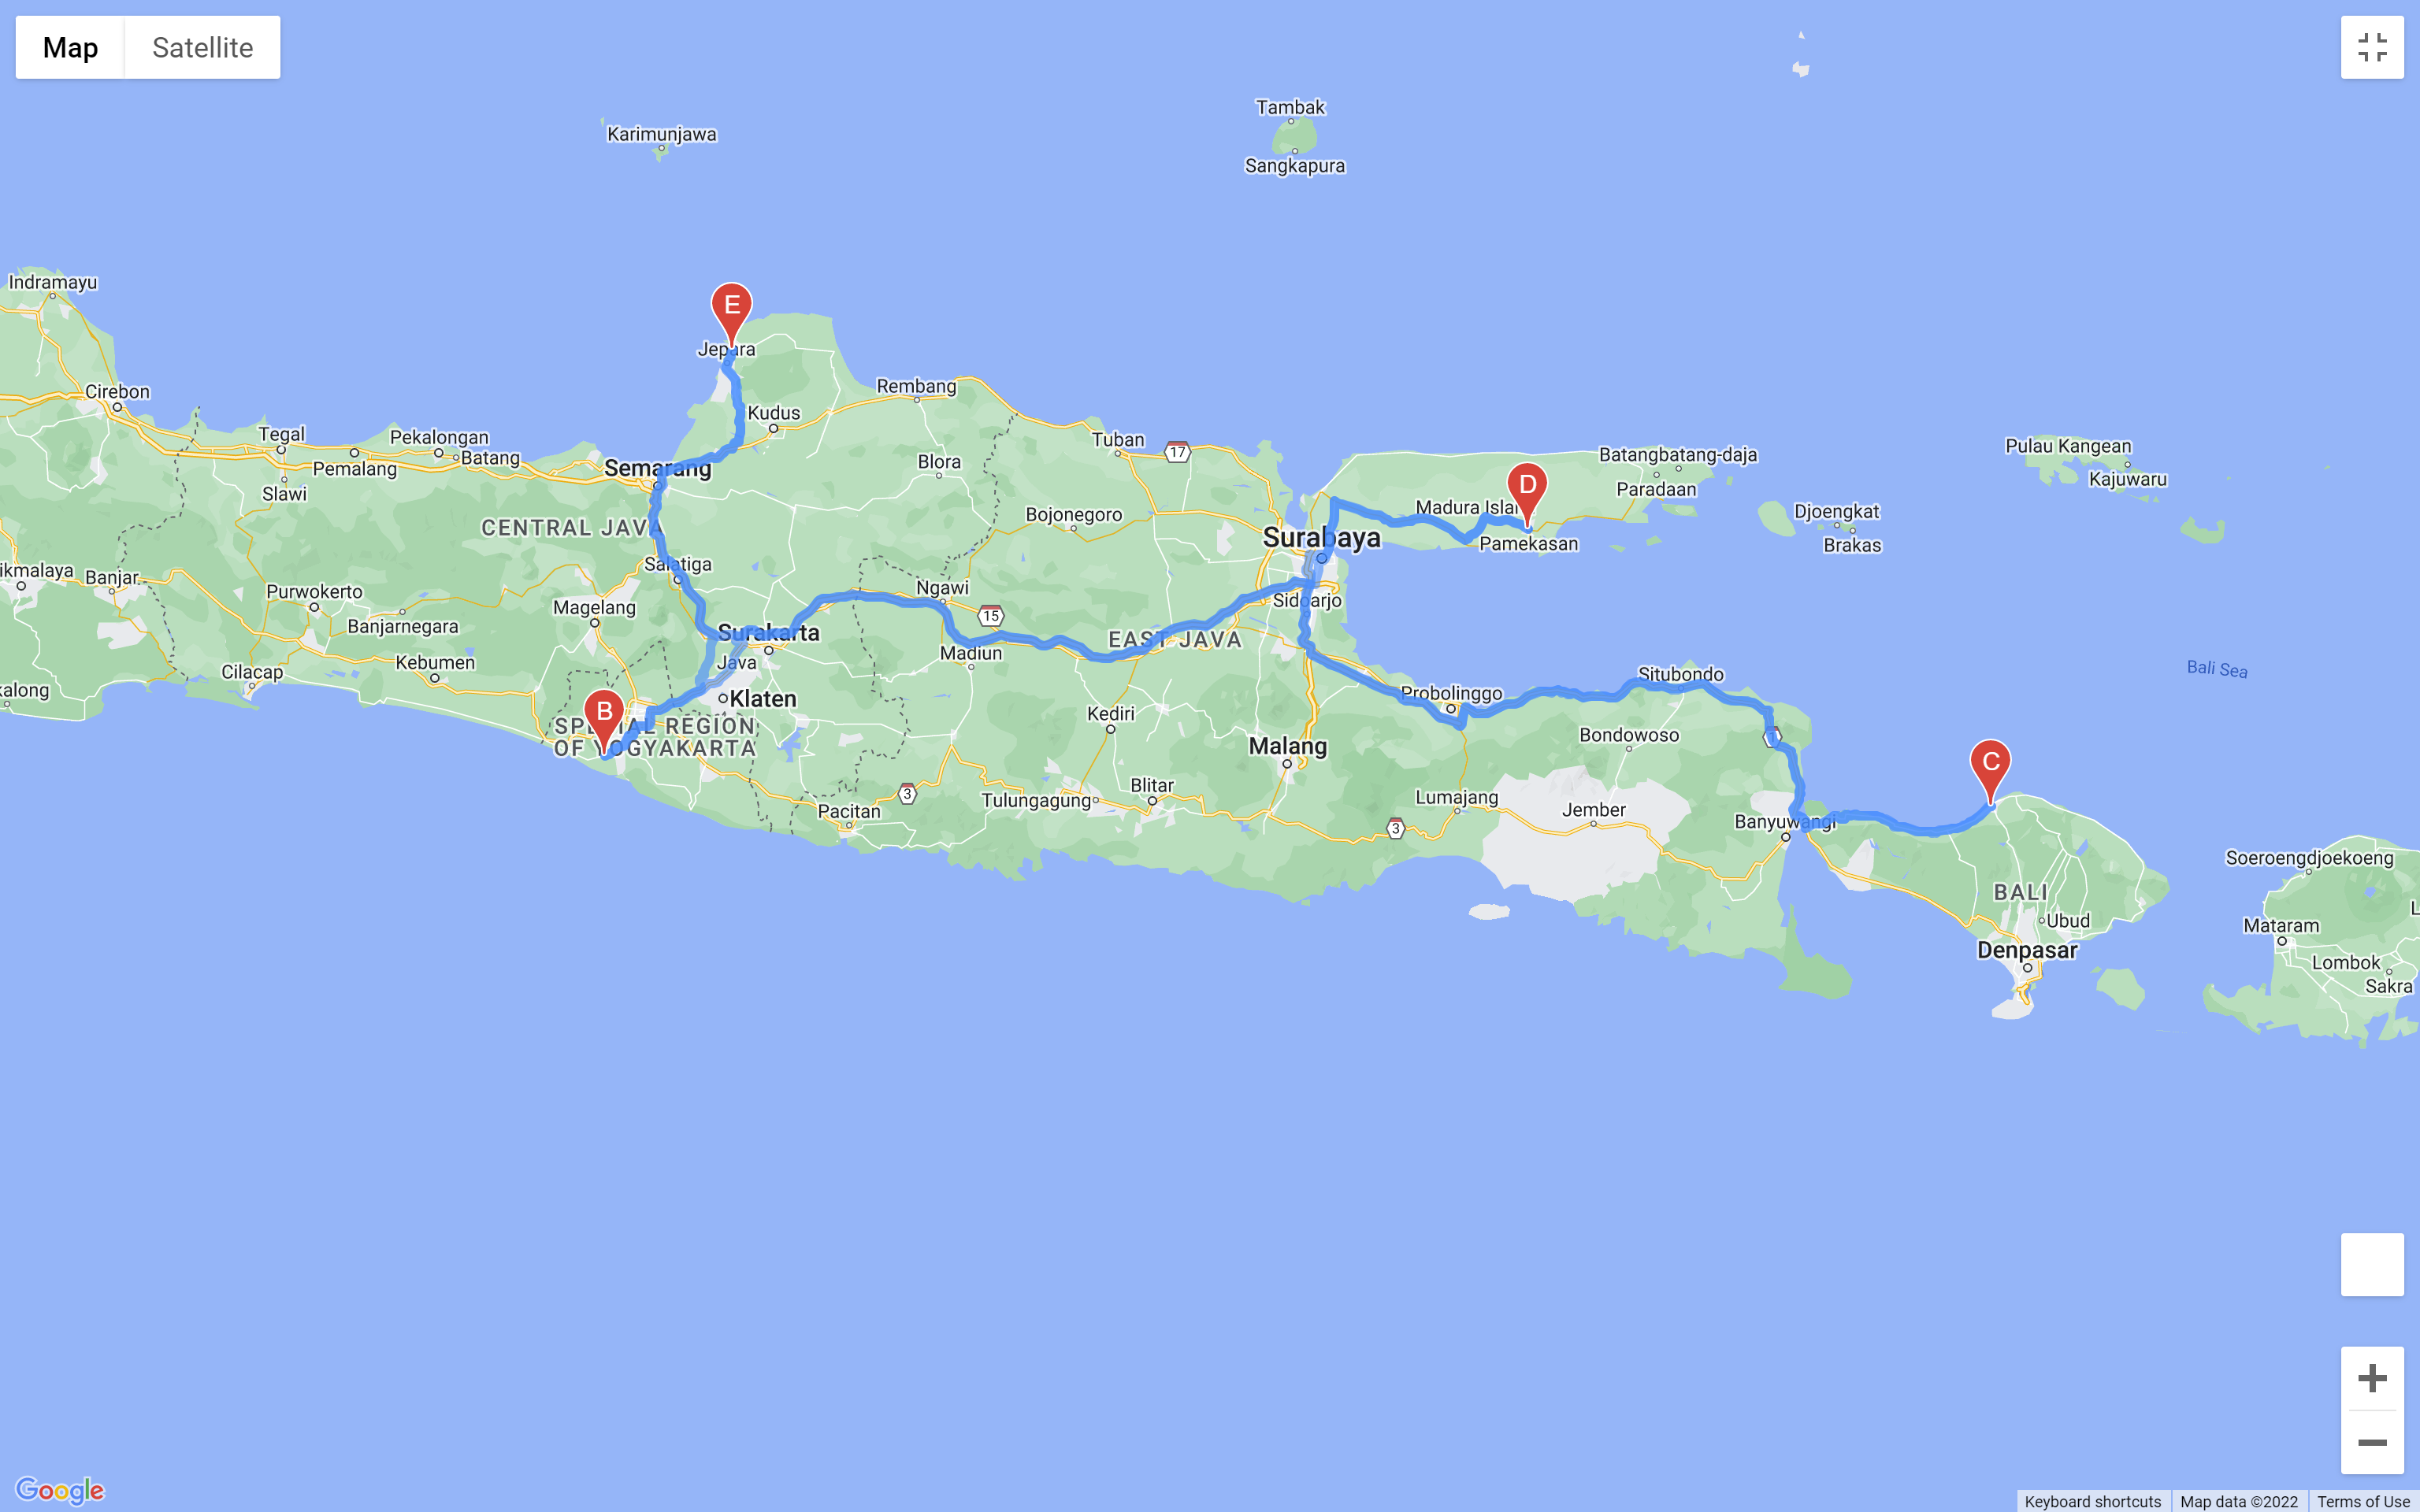

In [90]:
# 8. To create a marker layer map between the four cities.
#  Combine the four city DataFrames into one DataFrame using the concat() function.
itinerary_df = pd.concat([vacation_start, vacation_stop1, vacation_stop2, vacation_stop3, vacation_end],ignore_index=True)
itinerary_df

,City_ID,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
0,99,Mlonggo,ID,83.66,overcast clouds,-6.5333,110.7000,Asia Metal Art
1,420,Srandakan,ID,81.73,light rain,-7.9386,110.2506,Puri Brata
2,442,Singaraja,ID,82.65,overcast clouds,-8.1120,115.0882,Puri Bagus Lovina Resort
3,544,Pamekasan,ID,82.65,overcast clouds,-7.1568,113.4746,OYO 3027 Griya Temenggungan Syariah
4,99,Mlonggo,ID,83.66,overcast clouds,-6.5333,110.7000,Asia Metal Art


In [91]:
# 9 Using the template add city name, the country code, the weather description and maximum temperature for the city. 
info_box_template = """
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Current Weather</dt><dd>{Current Description} and {Max Temp} °F</dd>
"""

# 10a Get the data from each row and add it to the formatting template and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in itinerary_df.iterrows()]

# 10b. Get the latitude and longitude from each row and store in a new DataFrame.
locations = itinerary_df[["Lat", "Lng"]]

In [92]:
# 11a. Add a marker layer for each city to the map.
fig = gmaps.figure()
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(marker_layer)
# 11b. Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

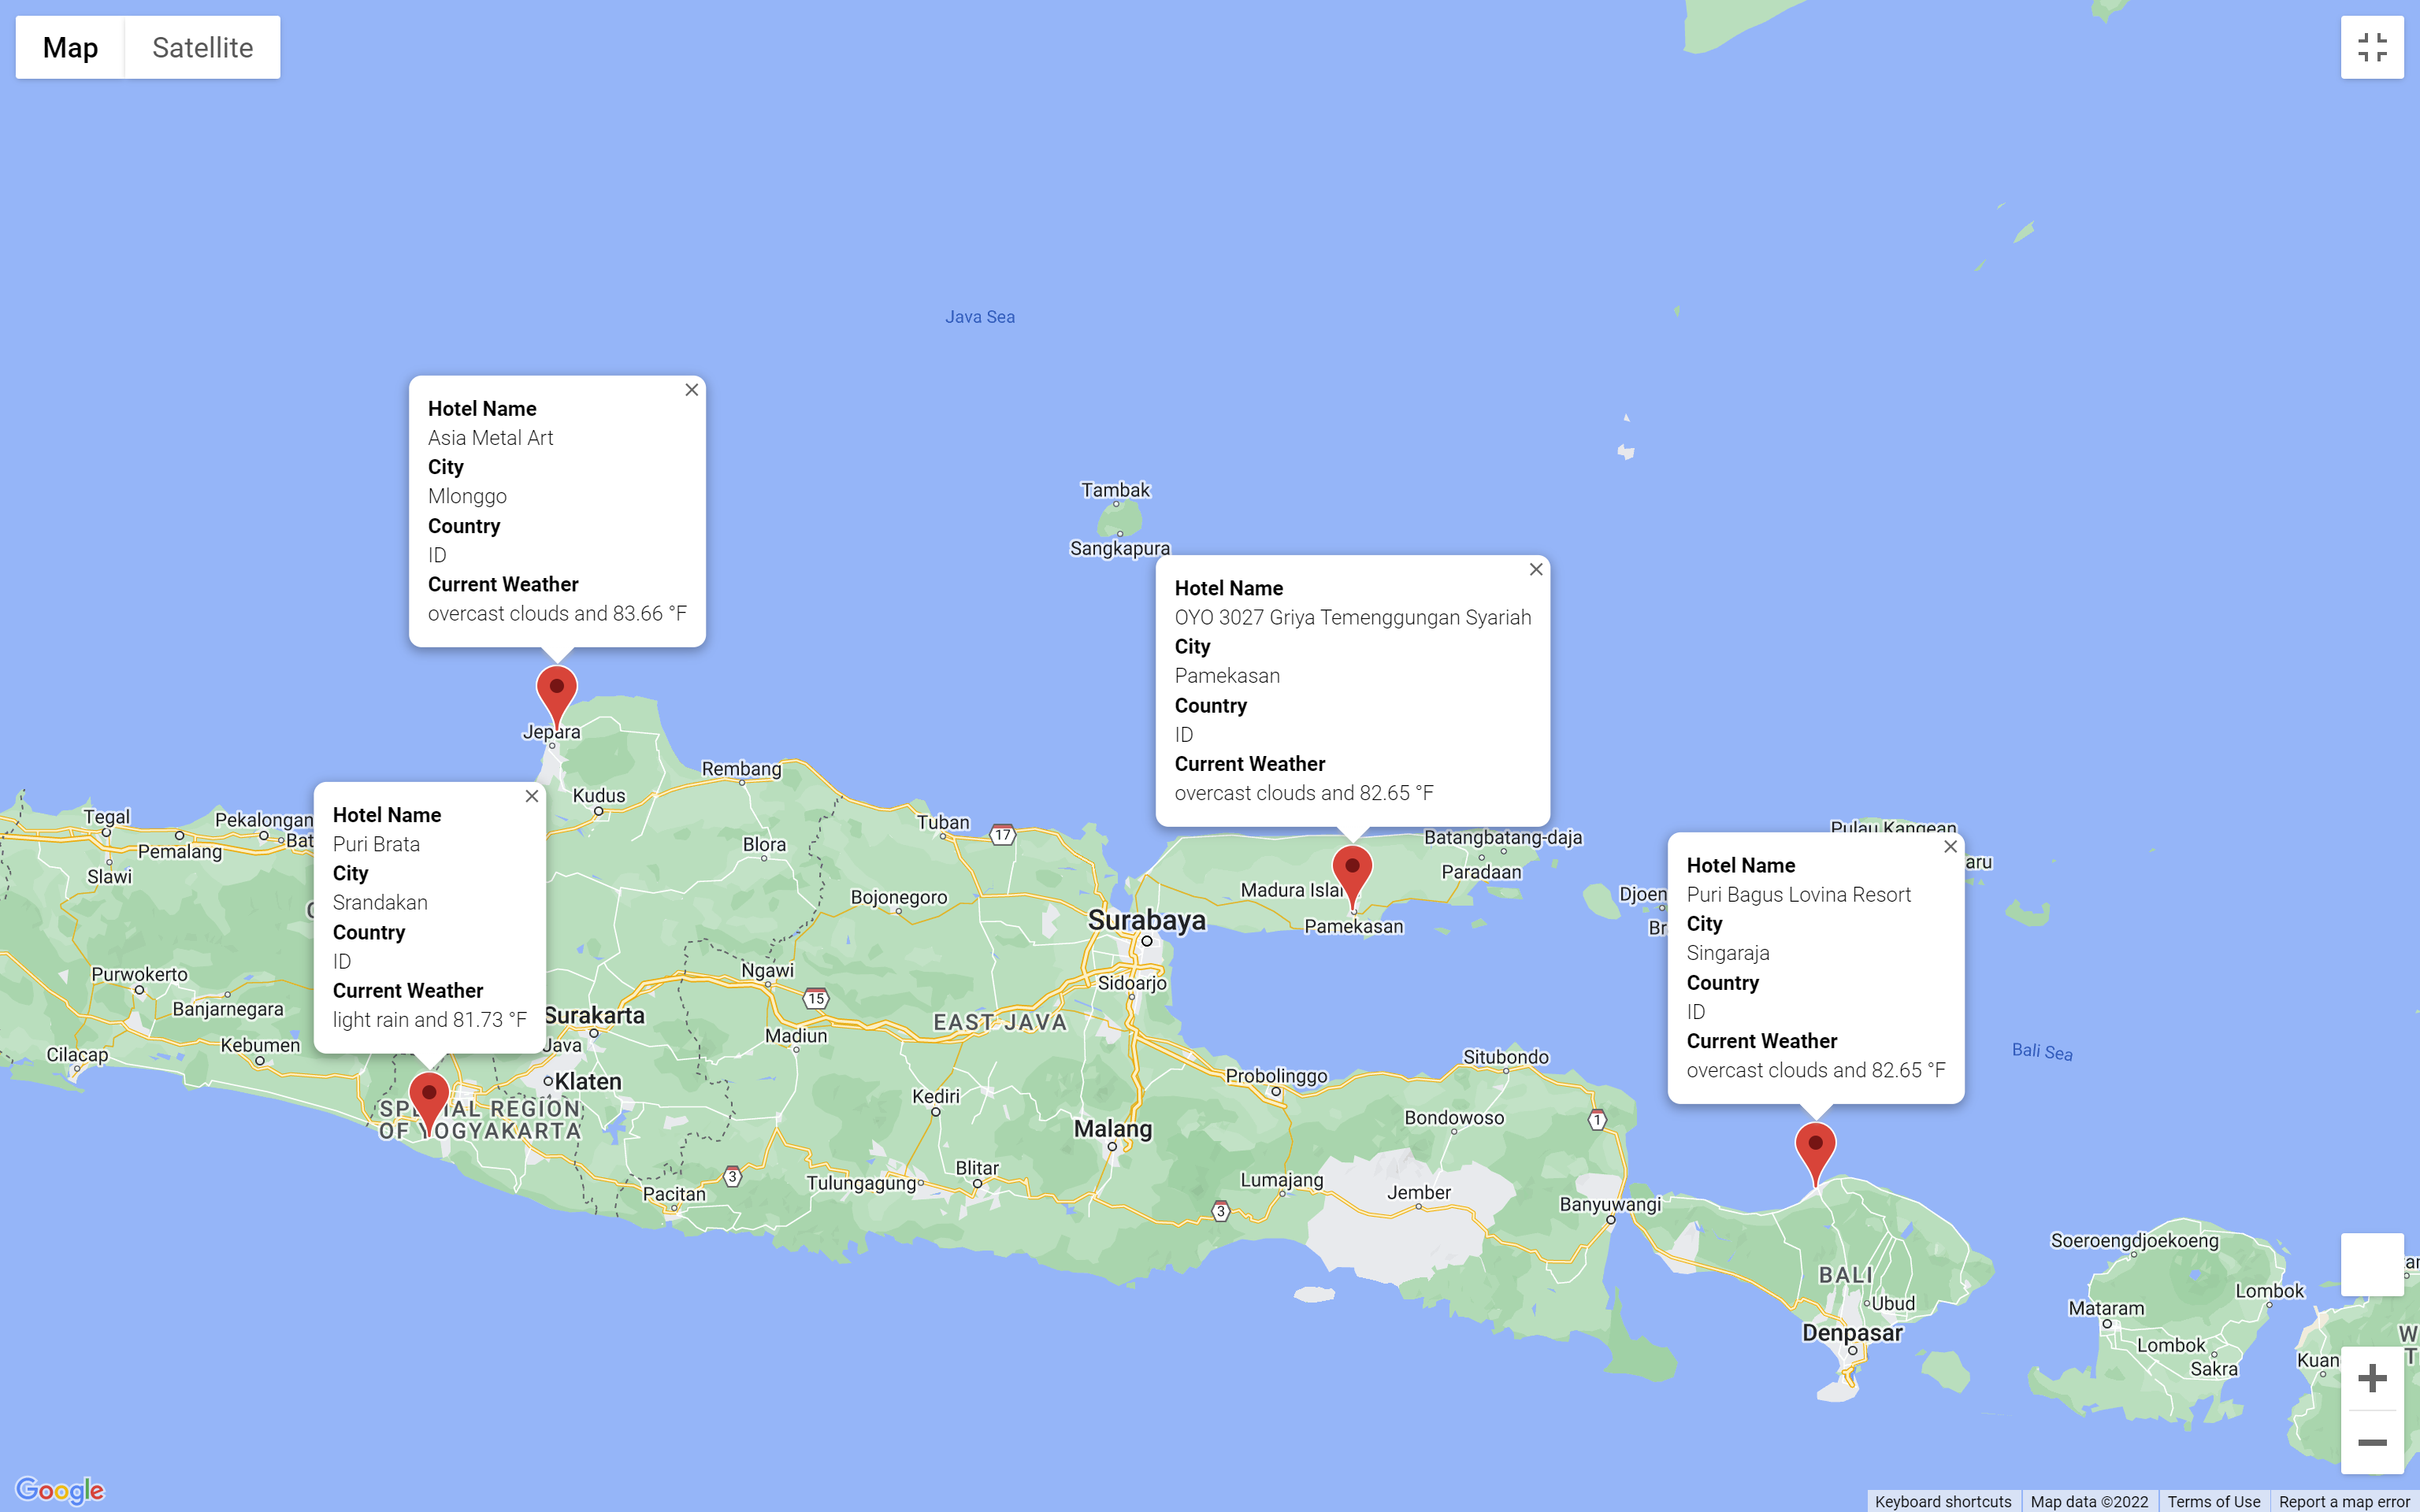